# **Install YOLOv8**

In [1]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.237 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

## **Dataset**

In [4]:
!mkdir dataset
!cd dataset

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="niVYqWyXFIsIj9OGJ6bz")
project = rf.workspace("project-1-qfzls").project("individual-teeth-labelling-wa1cf")
dataset = project.version(4).download("yolov8")

  Using cached roboflow-1.1.15-py3-none-any.whl (69 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.237, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to INDIVIDUAL-TEETH-LABELLING-4 in yolov8:: 100%|██████████| 1622/1622 [00:00<00:00, 3666.22it/s]


## **Training**

In [6]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/INDIVIDUAL-TEETH-LABELLING-4/data.yaml epochs=30 imgsz=640

100% 22.8M/22.8M [00:00<00:00, 229MB/s]
Ultralytics YOLOv8.0.237 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/INDIVIDUAL-TEETH-LABELLING-4/data.yaml, epochs=30, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

In [7]:
!ls runs/segment/train/

args.yaml					    labels_correlogram.jpg  val_batch0_labels.jpg
BoxF1_curve.png					    labels.jpg		    val_batch0_pred.jpg
BoxP_curve.png					    MaskF1_curve.png	    val_batch1_labels.jpg
BoxPR_curve.png					    MaskP_curve.png	    val_batch1_pred.jpg
BoxR_curve.png					    MaskPR_curve.png	    val_batch2_labels.jpg
confusion_matrix_normalized.png			    MaskR_curve.png	    val_batch2_pred.jpg
confusion_matrix.png				    results.csv		    weights
events.out.tfevents.1704743044.e98ea20ad658.2266.0  results.png


Confusion Matrix

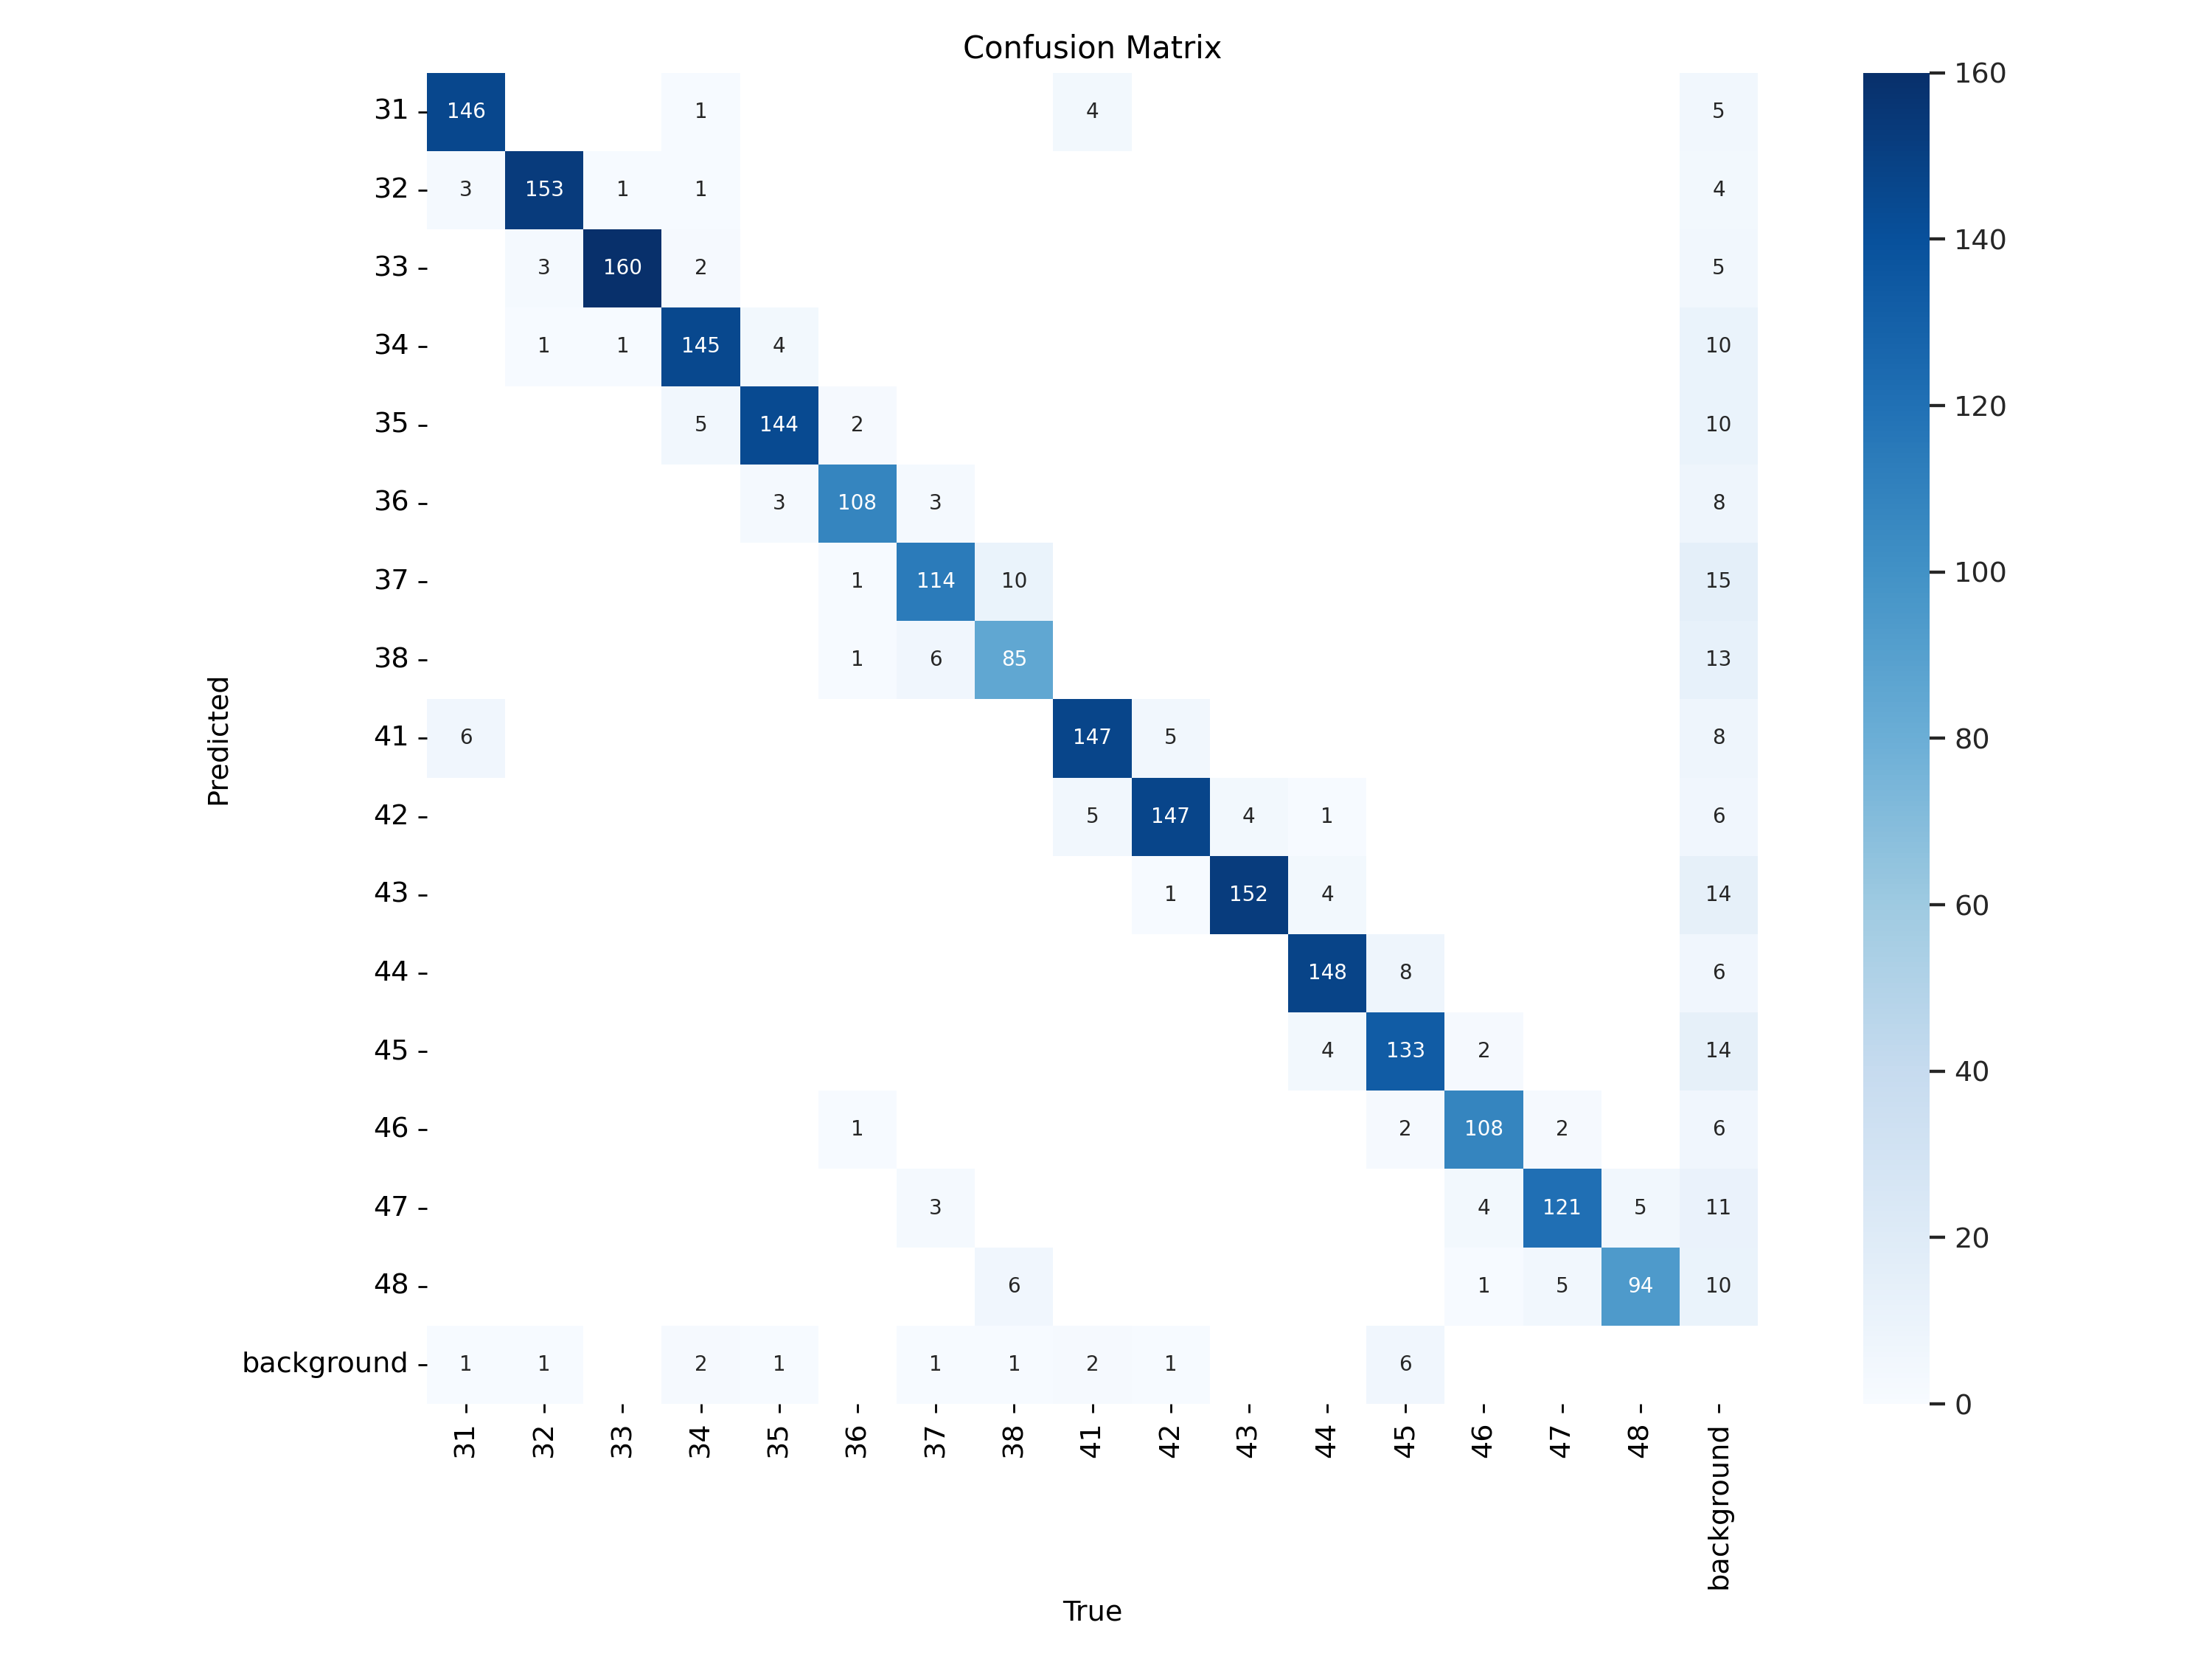

In [9]:
Image(filename=f'runs/segment/train/confusion_matrix.png', width=800)

Results

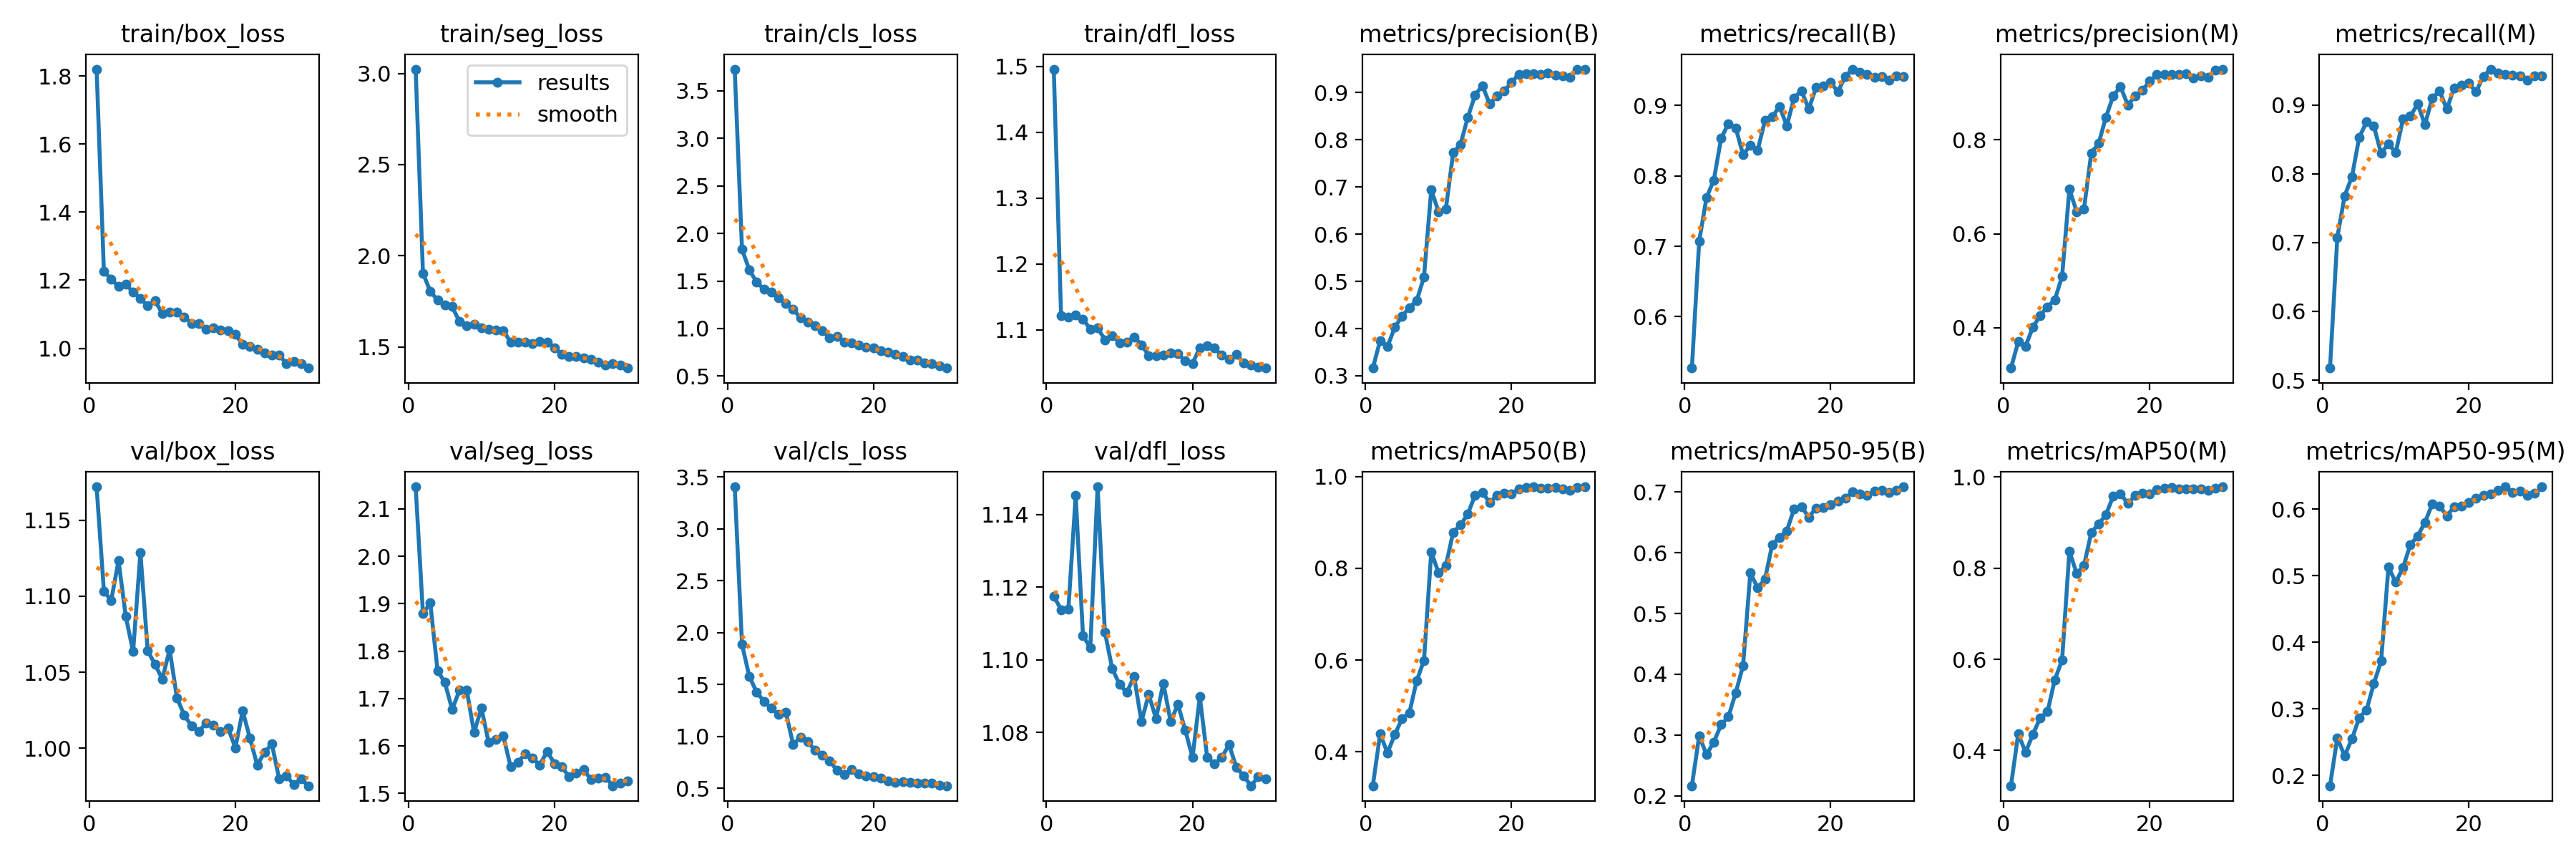

In [11]:
Image(filename=f'runs/segment/train/results.png', width=1000)

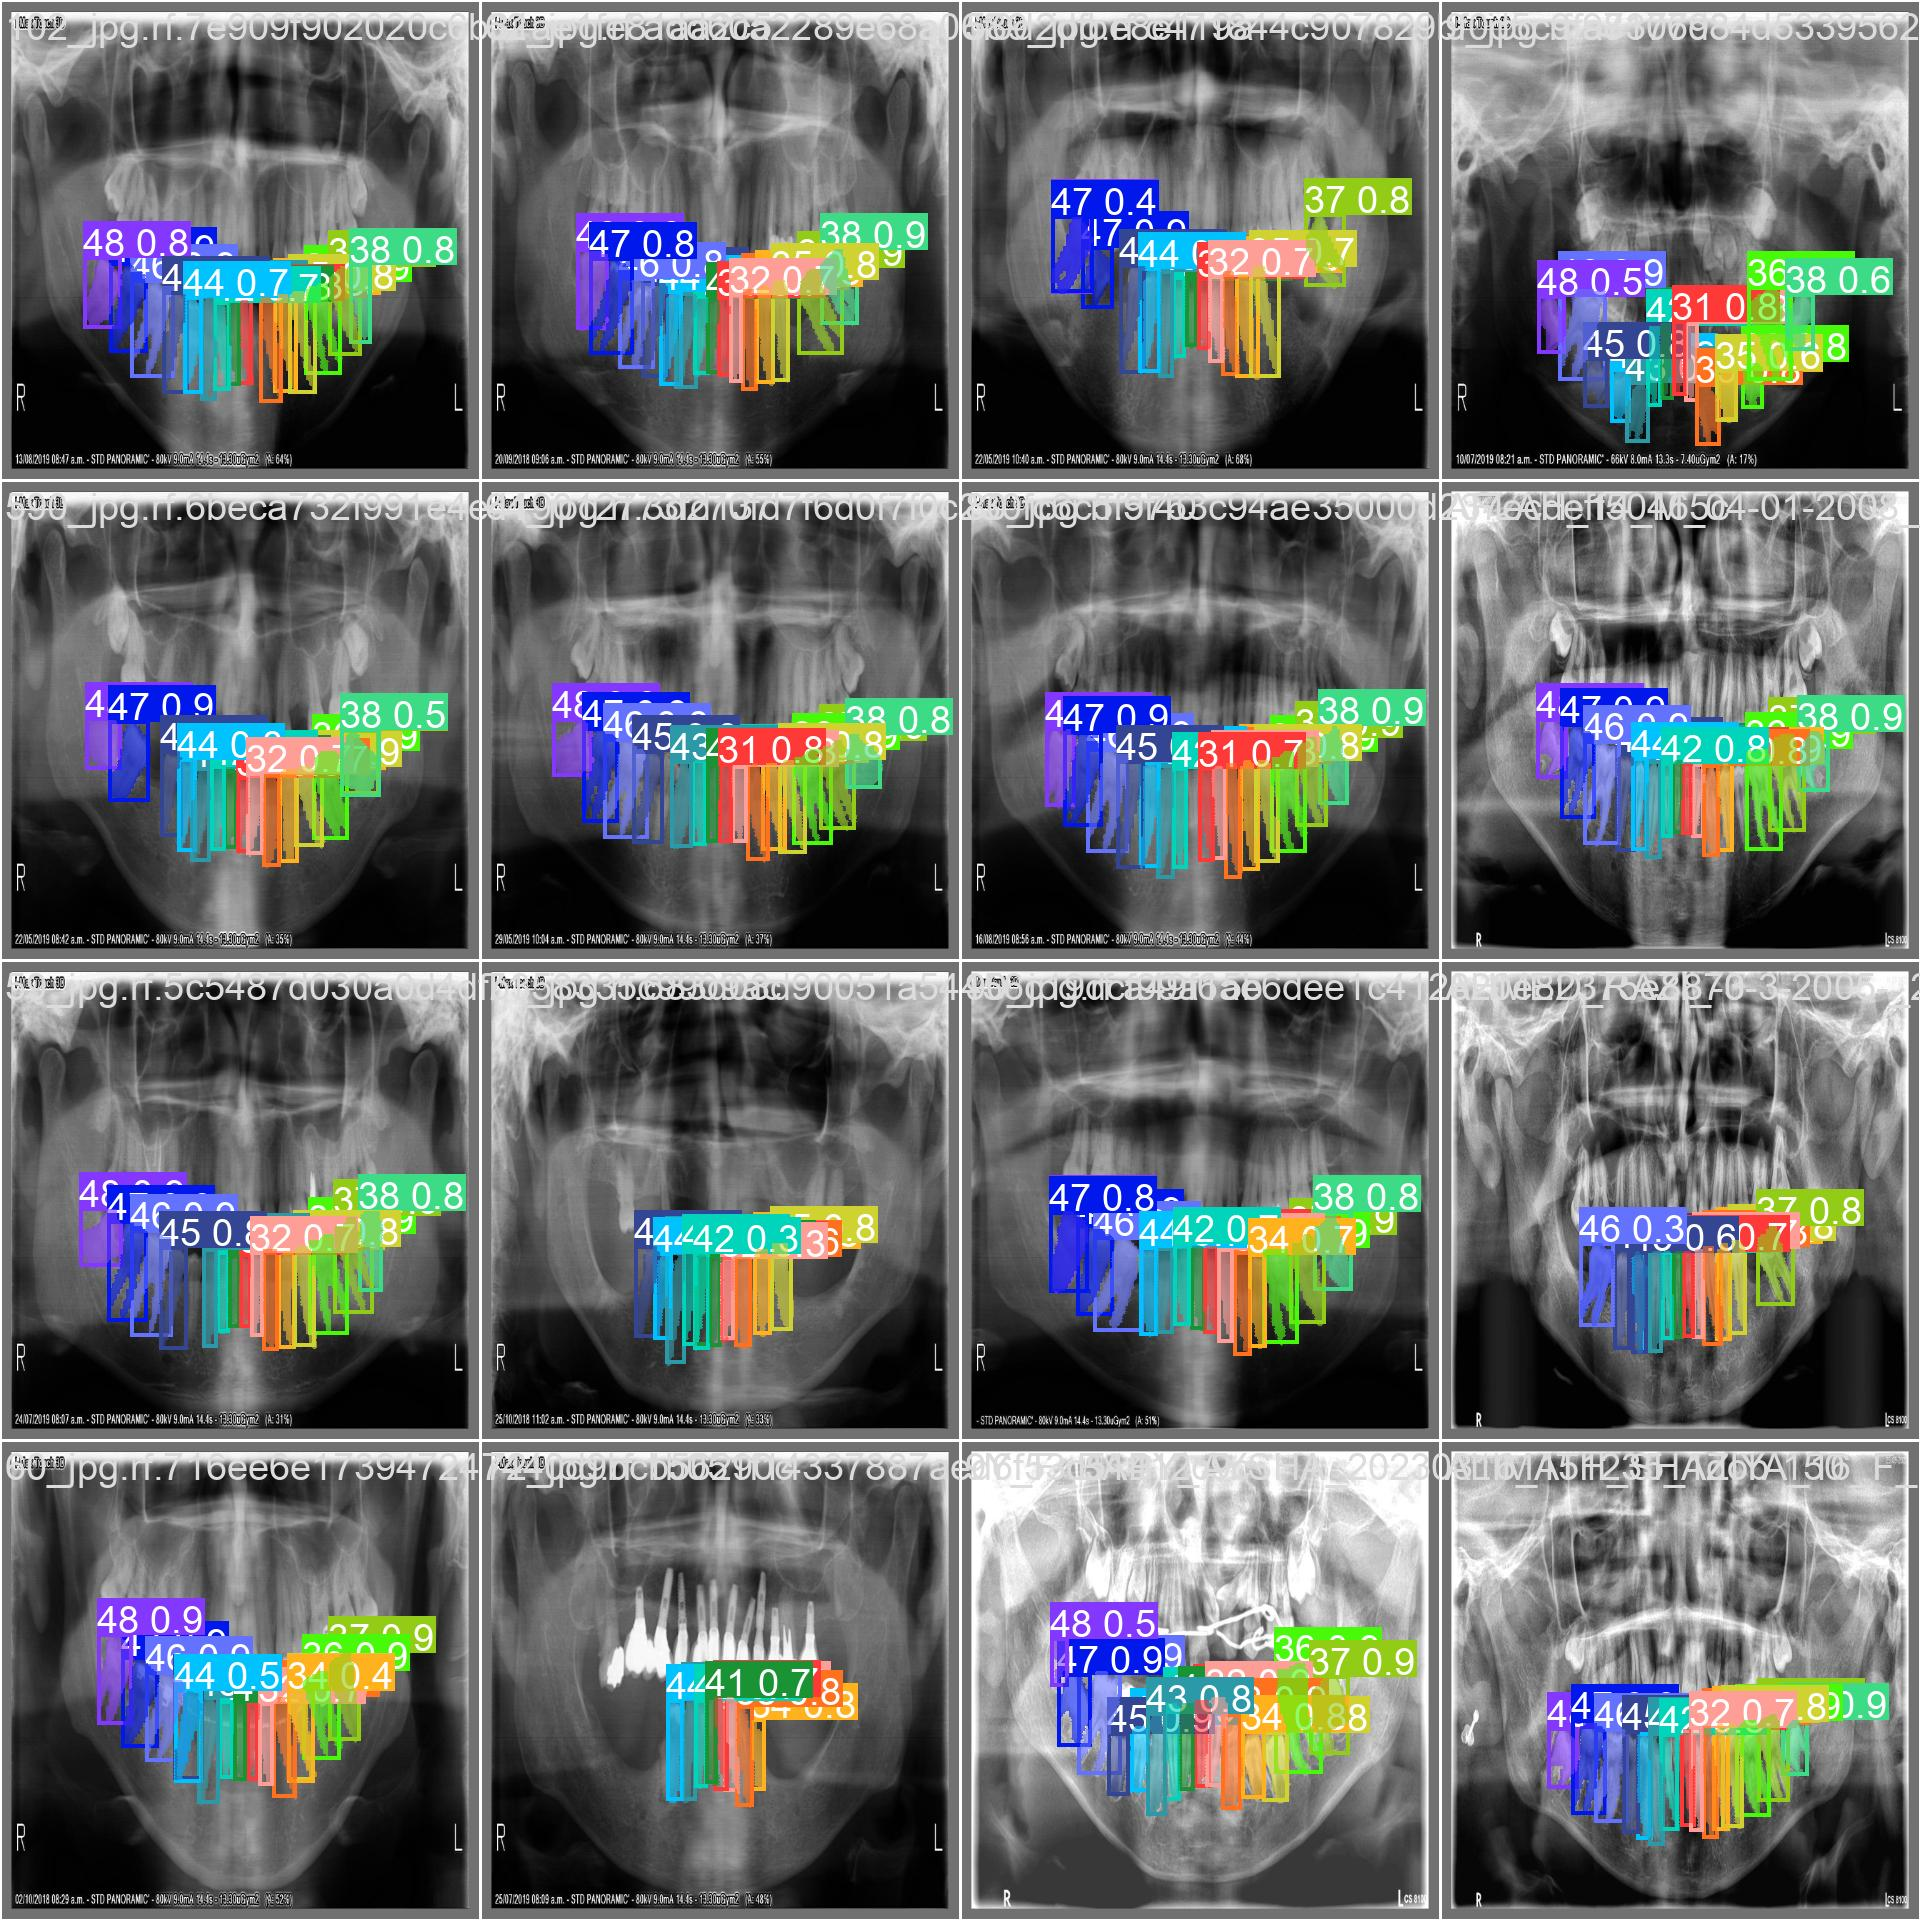

In [12]:
Image(filename=f'runs/segment/train/val_batch0_pred.jpg', width=600)

## **Validate Model**

In [13]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=/content/INDIVIDUAL-TEETH-LABELLING-4/data.yaml

Ultralytics YOLOv8.0.237 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785792 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/INDIVIDUAL-TEETH-LABELLING-4/valid/labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100% 161/161 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0% 0/11 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 1.300s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 11/11 [00:17<00:00,  1.60s/it]
                   all        161       2242       0.95      0.856      0.895       0.65      0.951      0.857      0.897      0.573
                    31        161        156       0.97      0.831      0.872      0.507      0.978      0.837      0.885      0.439
                    32        161        158 

## **Predict with Model**

In [15]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=/content/INDIVIDUAL-TEETH-LABELLING-4/test/images save=true

Ultralytics YOLOv8.0.237 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785792 parameters, 0 gradients, 42.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/16 /content/INDIVIDUAL-TEETH-LABELLING-4/test/images/16_jpg.rf.664867cd854568ef003c0a3b98bb39a2.jpg: 640x640 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 21.4ms
image 2/16 /content/INDIVIDUAL-TEETH-LABELLING-4/test/images/207_jpg.rf.ff66bc49e602e2a248526f2191a1a321.jpg: 640x640 2 31s, 1 32, 1 33, 1 35, 1 41, 1 42, 1 43, 1 44, 1 45, 21.1ms
image 3/16 /content/INDIVIDUAL-TEETH-LABELLING-4/test/images/221_jpg.rf.8b39db485f1a696881613f38f915f9f4.jpg: 640x640 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 41, 1 42, 1 43, 1 44, 1 45, 1 47, 21.1ms
image 4/16 /content/INDIVIDUAL-TEETH-LABELLING-4/test/images/243_jpg.rf.8513b0d08958f8c6923ef127f8dca839.jpg: 640x640 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1

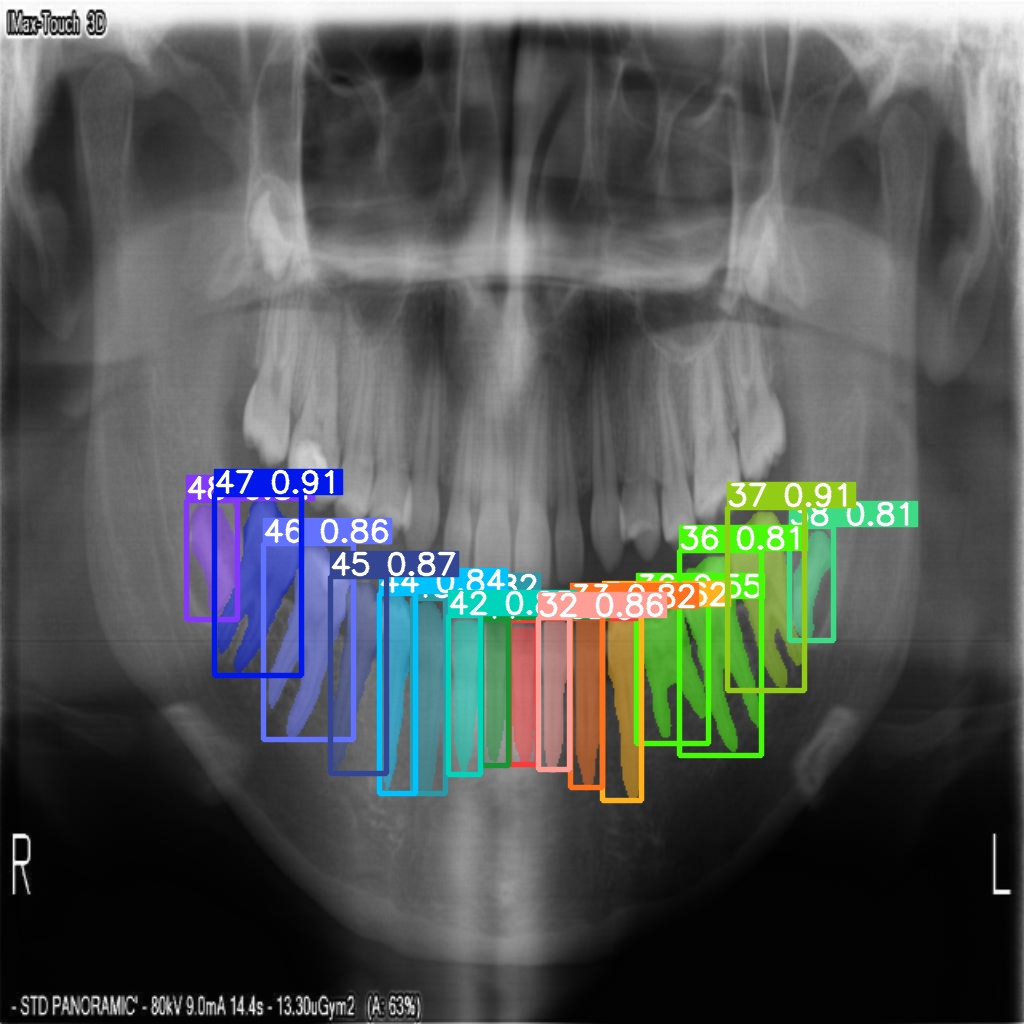

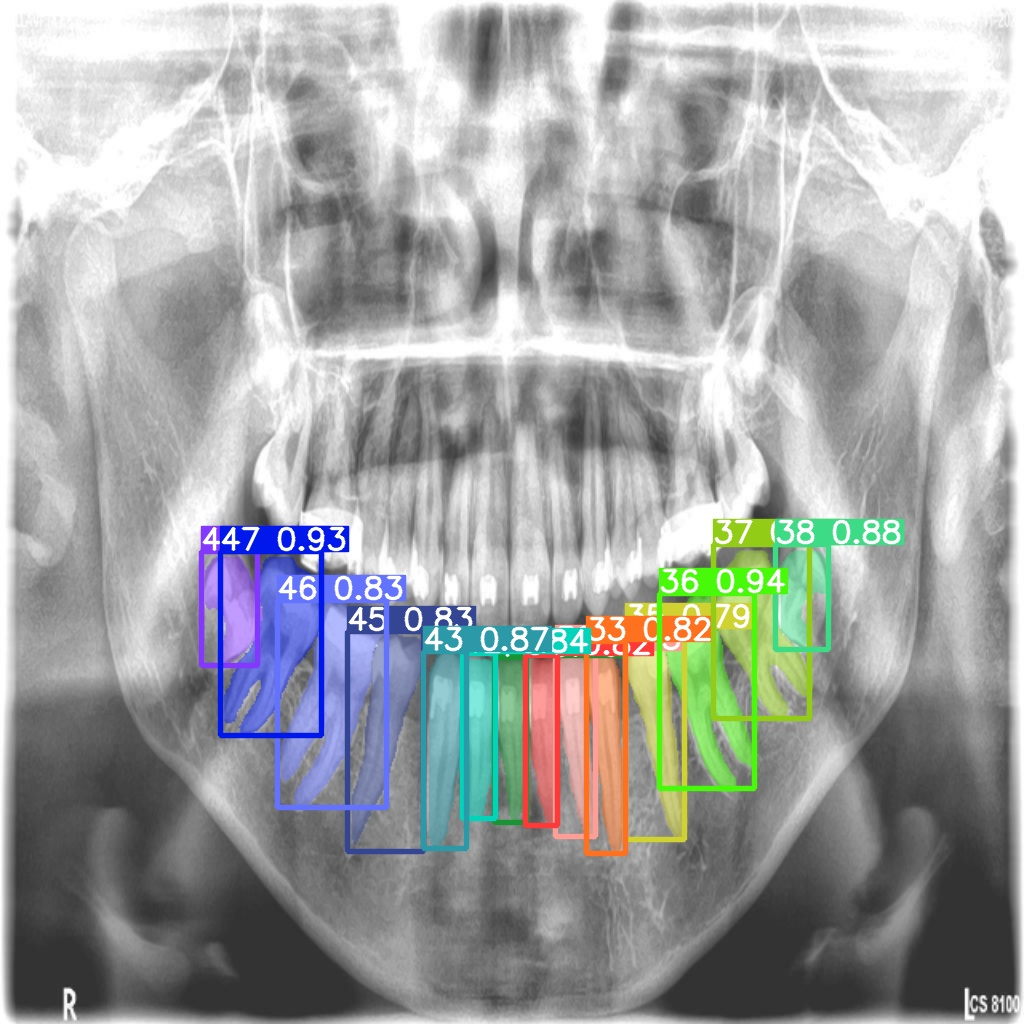

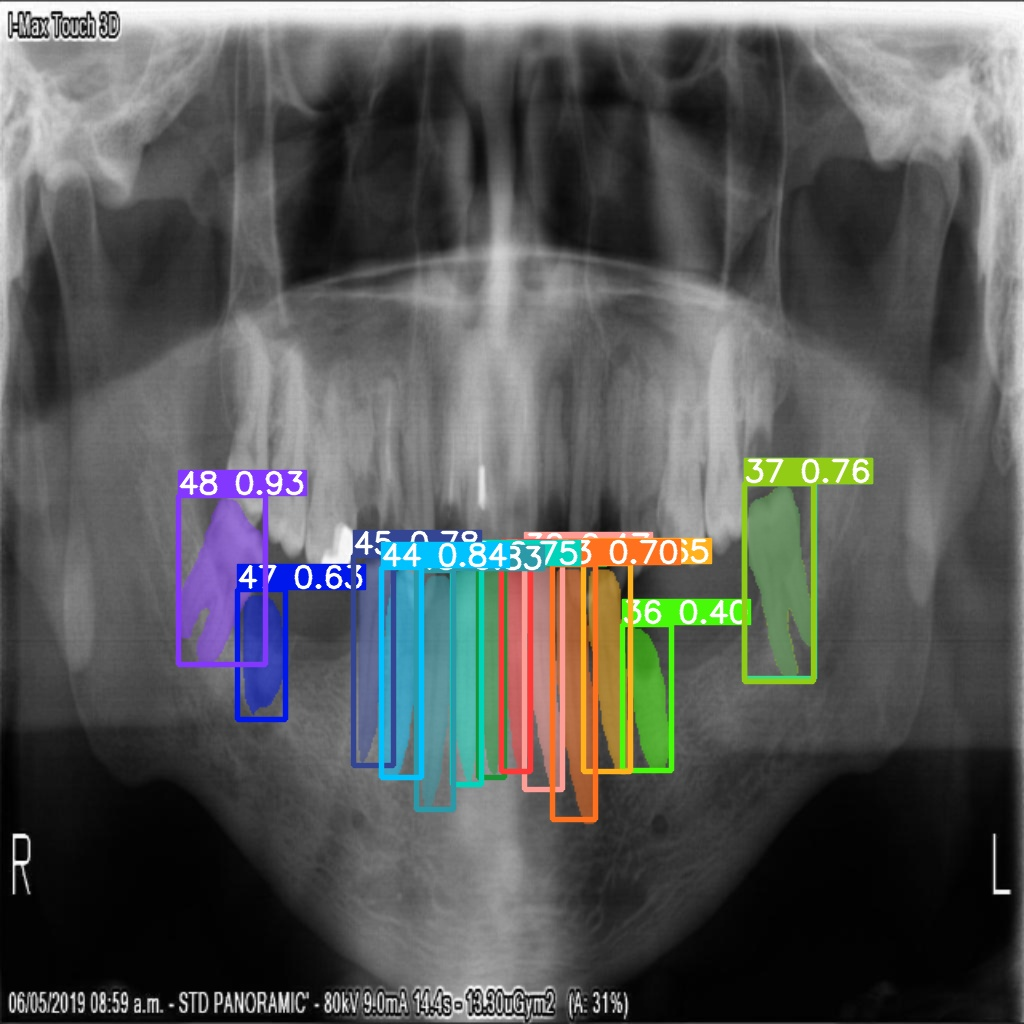

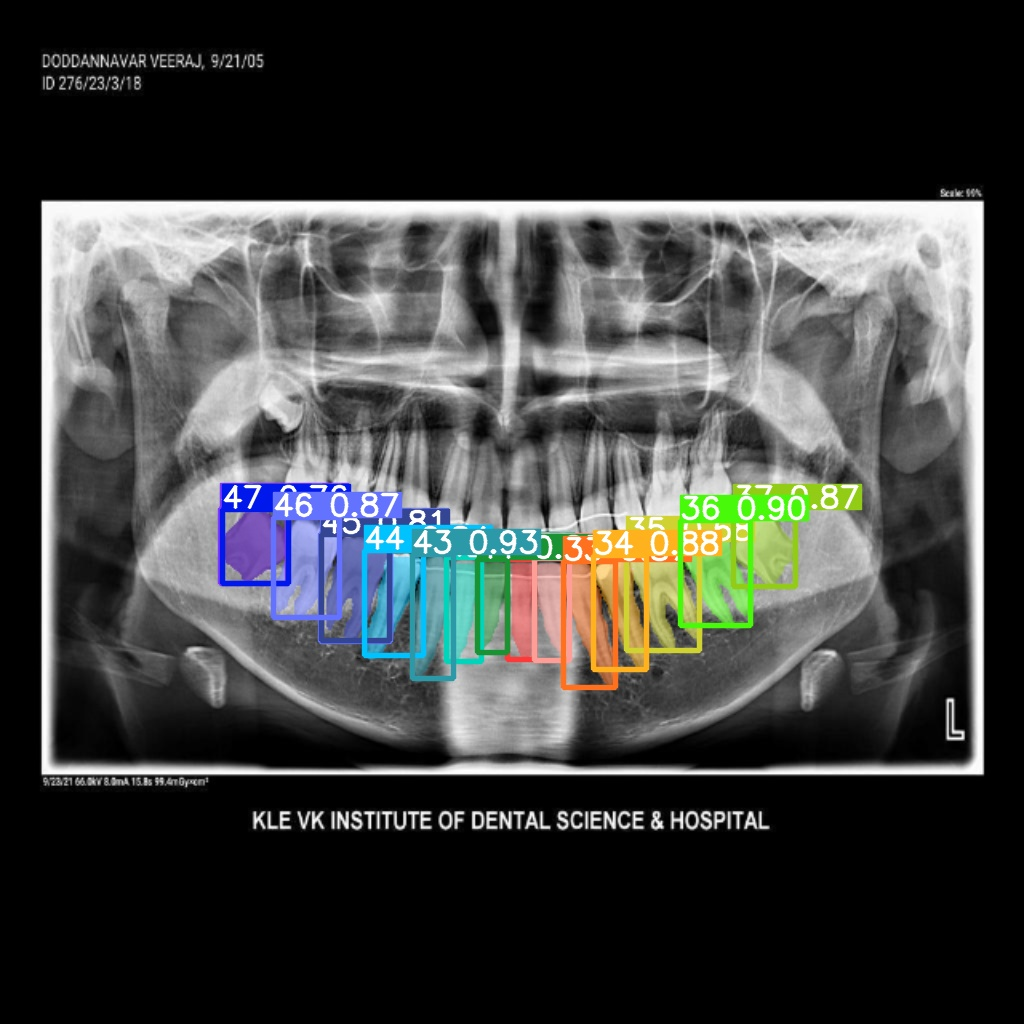

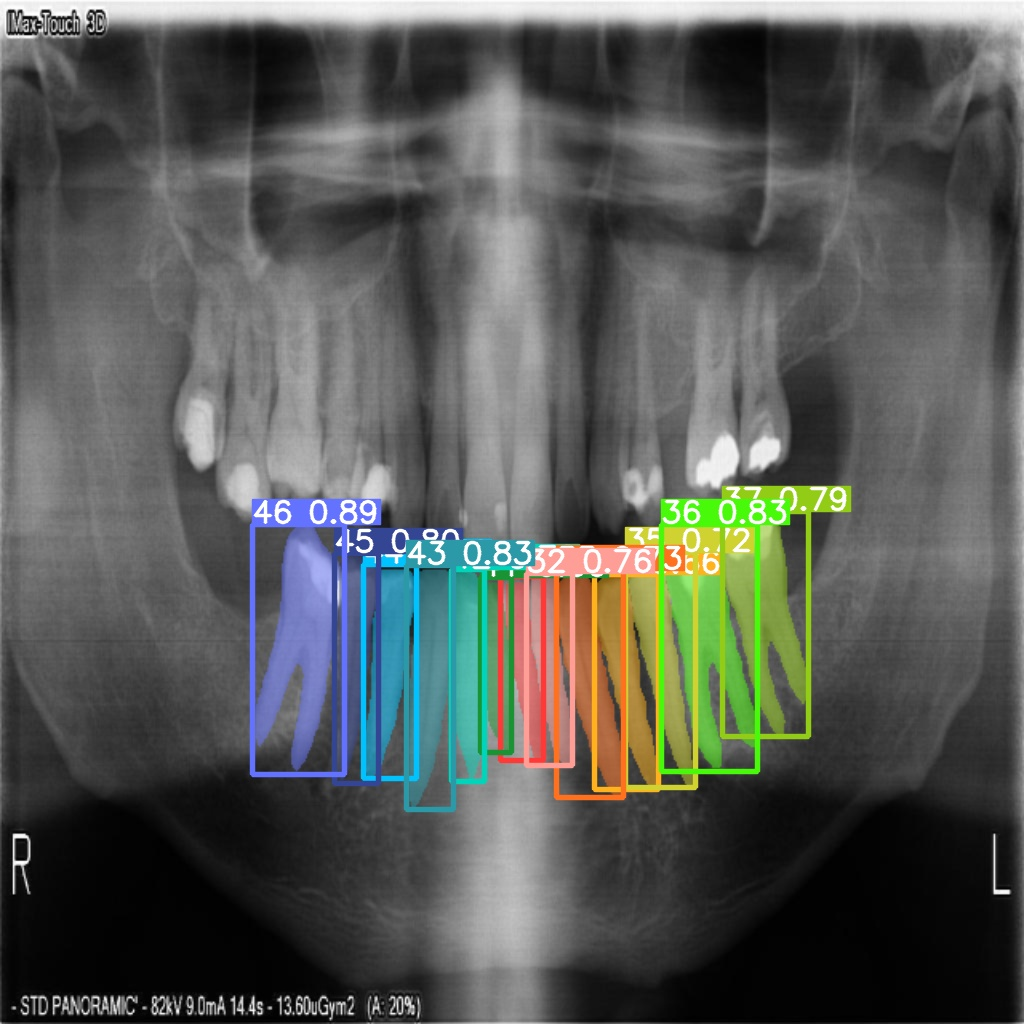

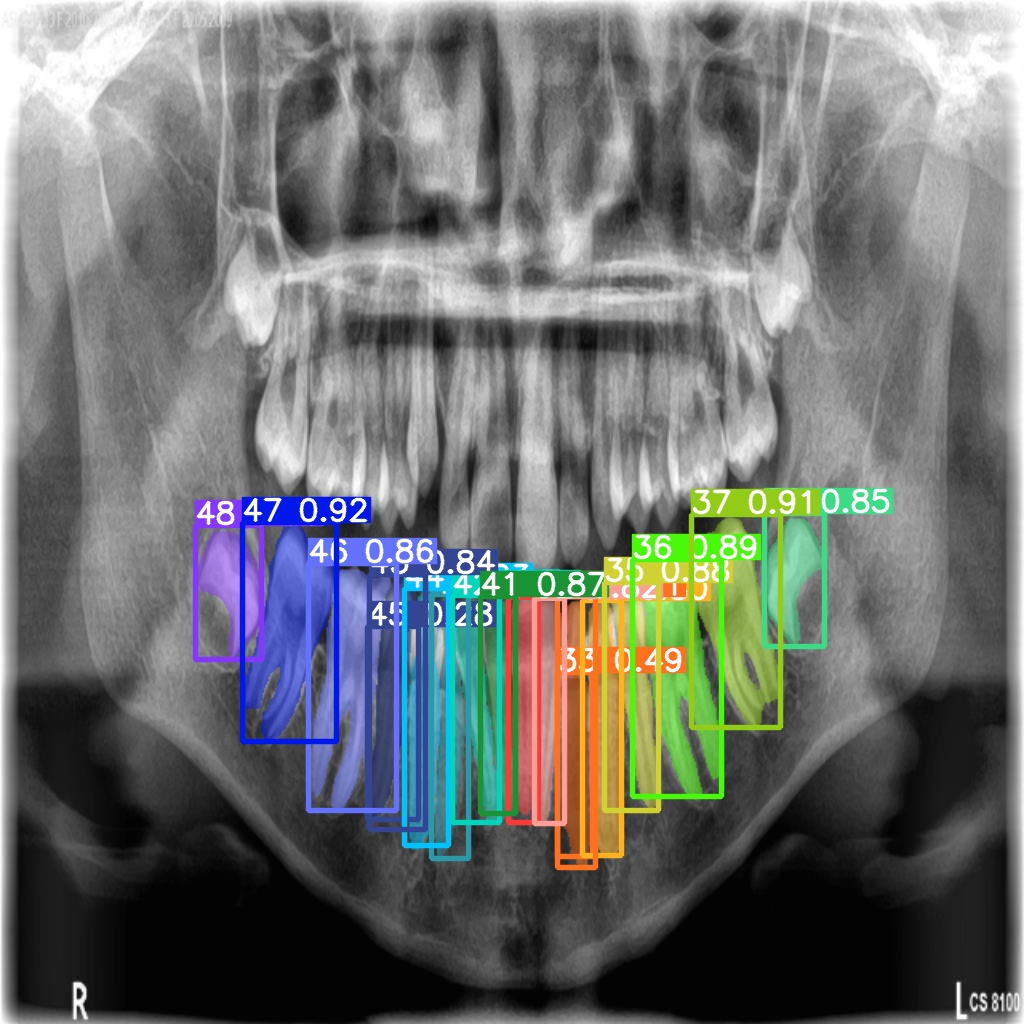

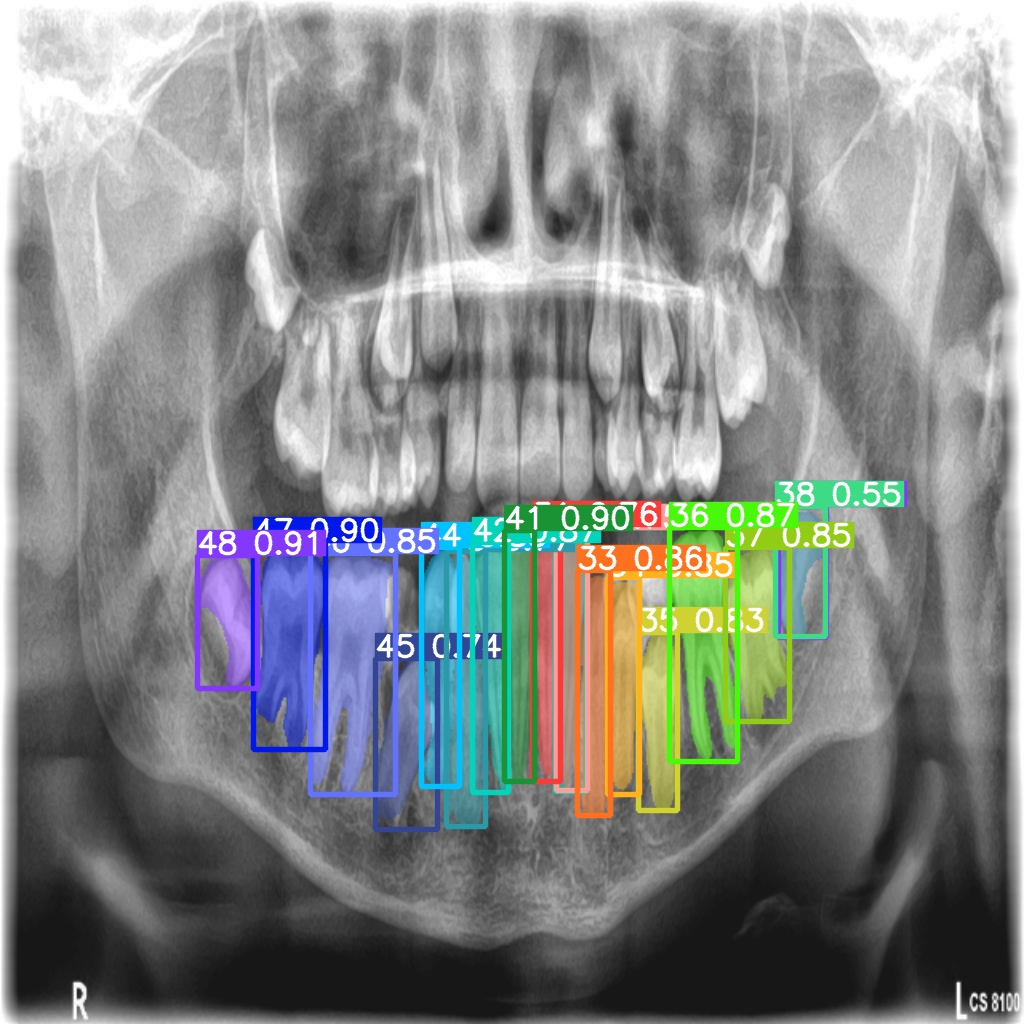

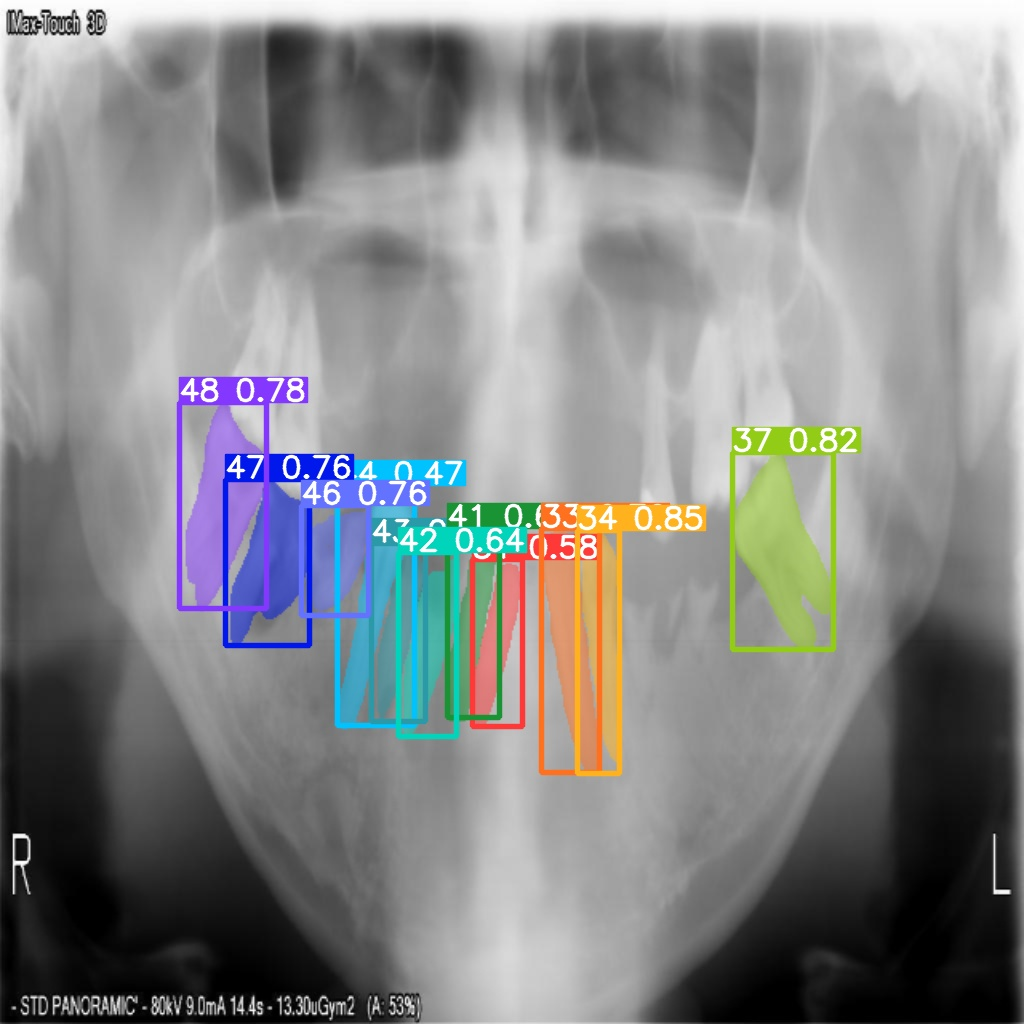

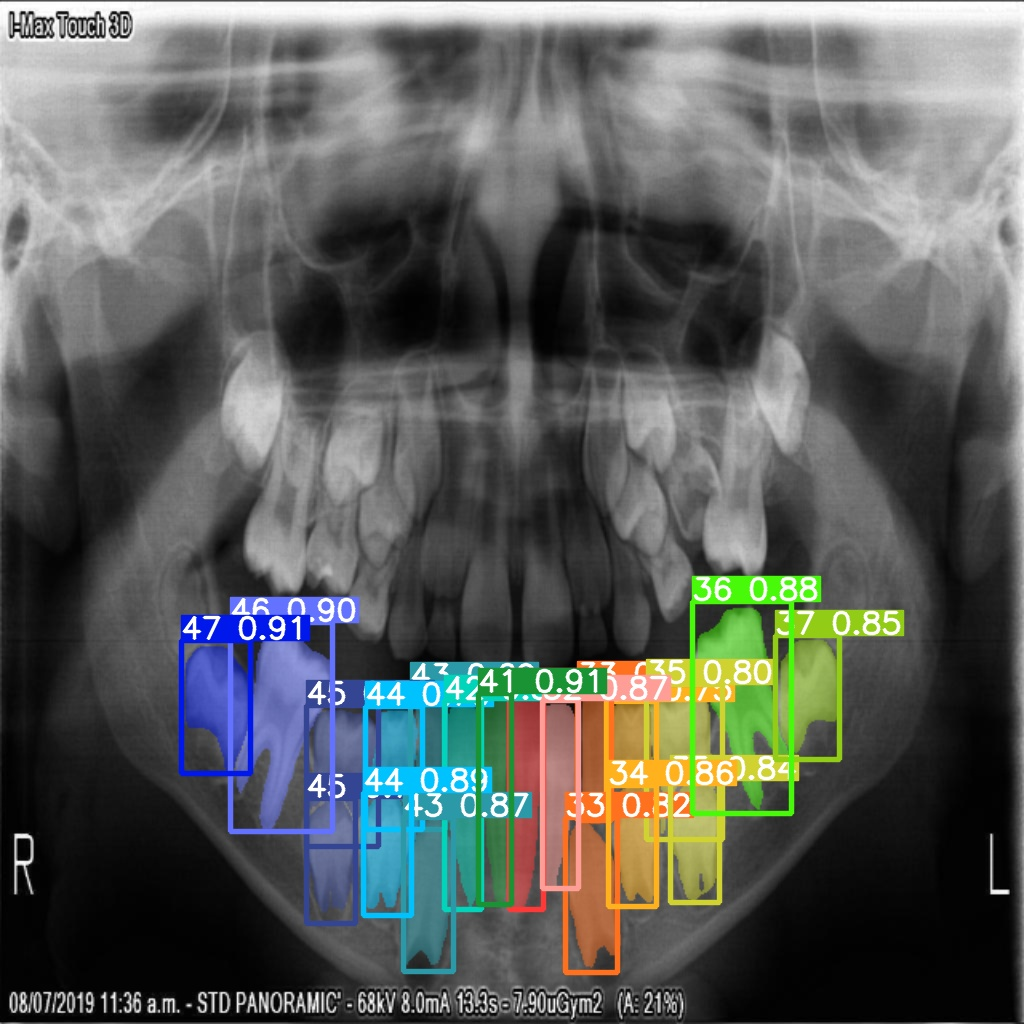

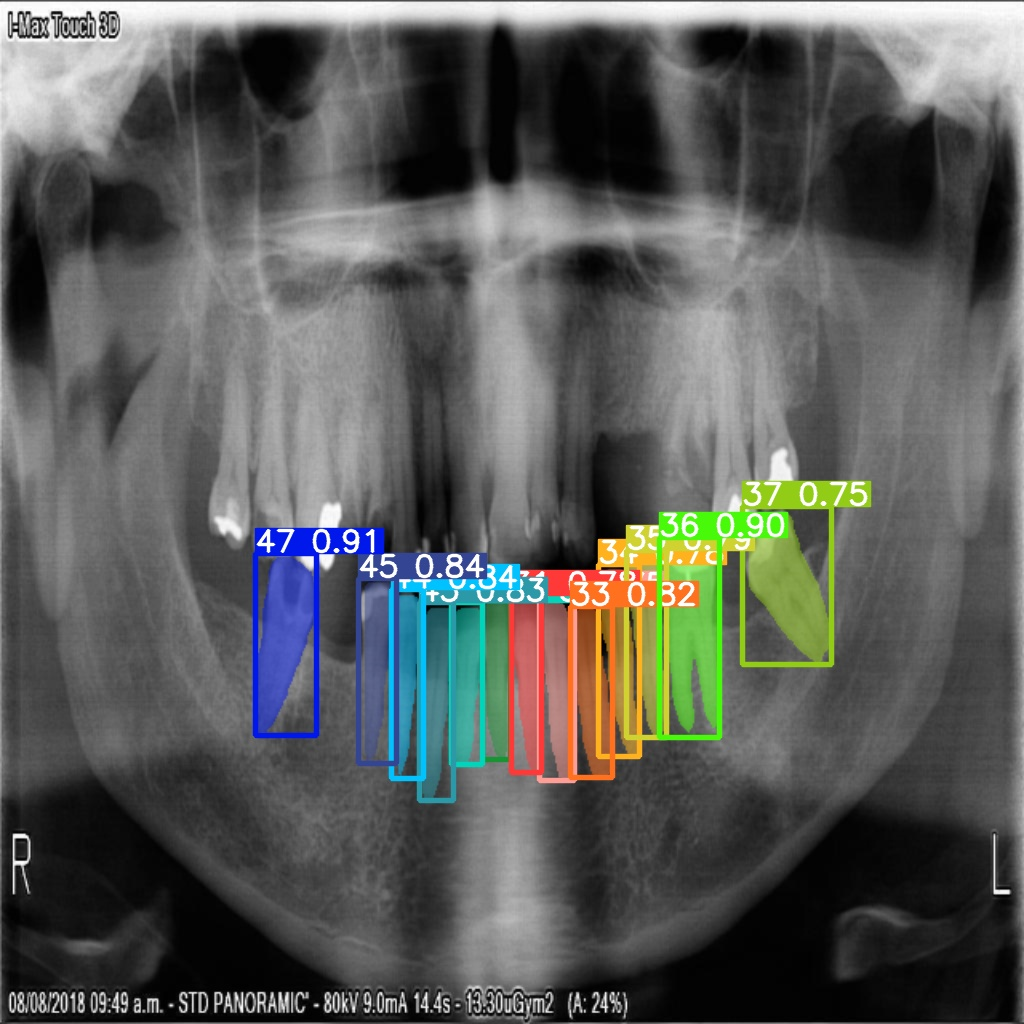

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")